# Dealing with Missing values

In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [2]:
Melbourne_df = pd.read_csv("Melbourne_housing.csv")
# remove any Unnamed columns from dataset
Melbourne_df = Melbourne_df.loc[:, ~Melbourne_df.columns.str.contains('^Unnamed')]
Melbourne_df # original dataset

Suburb         Address  Rooms Type      Price Method  \
0             Thornbury  7/67 Pender St      2    u   438000.0     SP   
1                Coburg      32 Rose St      2    h   901000.0      S   
2        Bentleigh East  2/25 Brooks St      3    u   800000.0      S   
3     Templestowe Lower    2/35 John St      3    t  1155000.0      S   
4           South Yarra   1/35 Marne St      3    u  1630000.0     PI   
..                  ...             ...    ...  ...        ...    ...   
494            Sunshine  74 Hertford Rd      2    h   965000.0      S   
495          Springvale   15 Phillip Av      3    h   721000.0      S   
496         Middle Park     150 Page St      3    h  1750000.0     VB   
497             Glenroy   14 William St      3    h   501000.0     SP   
498  Heidelberg Heights     1 Dennis St      3    h        NaN      S   

      SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Love  22/08/2016       6.5      3071  ...       1.0  1.0       0.0   
1       Peter  27/06/2016       7.8      3058  ...       1.0  1.0     545.0   
2    Woodards  28/05/2016      13.9      3165  ...       2.0  2.0     261.0   
3      Jellis  25/11/2017      12.4      3107  ...       NaN  NaN       NaN   
4      Jellis   10/9/2016       3.3      3141  ...       1.0  1.0       0.0   
..        ...         ...       ...       ...  ...       ...  ...       ...   
494     Barry  26/08/2017      10.5      3020  ...       1.0  1.0       NaN   
495      Hall  24/06/2017      20.8      3171  ...       NaN  NaN       NaN   
496      Greg  27/05/2017       3.0      3206  ...       2.0  0.0     138.0   
497     Raine  28/05/2016      13.0      3046  ...       1.0  1.0     348.0   
498     Barry  24/06/2017       8.8      3081  ...       1.0  1.0     650.0   

     BuildingArea  YearBuilt                     CouncilArea Lattitude  \
0            66.0     1970.0            Darebin City Council -37.75410   
1           107.0     1940.0            Darebin City Council -37.74450   
2             NaN        NaN          Glen Eira City Council -37.91630   
3             NaN        NaN         Manningham City Council       NaN   
4             NaN        NaN          Melbourne City Council -37.83590   
..            ...        ...                             ...       ...   
494           NaN        NaN           Brimbank City Council -37.78227   
495           NaN        NaN  Greater Dandenong City Council       NaN   
496         155.0     1885.0       Port Phillip City Council -37.84962   
497           NaN        NaN           Moreland City Council -37.71190   
498           NaN        NaN            Banyule City Council -37.74142   

     Longtitude                  Regionname Propertycount  
0     145.00880       Northern Metropolitan          8870  
1     144.94710       Northern Metropolitan         11204  
2     145.07790       Southern Metropolitan         10969  
3           NaN        Eastern Metropolitan          5420  
4     144.98390       Southern Metropolitan         14887  
..          ...                         ...           ...  
494   144.84038        Western Metropolitan          3755  
495         NaN  South-Eastern Metropolitan          7412  
496   144.95856       Southern Metropolitan          2019  
497   144.91110       Northern Metropolitan          8870  
498   145.05535        Eastern Metropolitan          2947  

[499 rows x 21 columns]

In [3]:
missing_values = Melbourne_df.isnull().sum()
missing_values

Suburb             0
Address            0
Rooms              0
Type               0
Price            108
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2         128
Bathroom         128
Car              137
Landsize         174
BuildingArea     310
YearBuilt        287
CouncilArea        0
Lattitude        122
Longtitude       122
Regionname         0
Propertycount      0
dtype: int64

# Plotting these feature which have missing values

In [4]:
columns_to_plot = ['Bedroom2', 'Bathroom', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'Car', 'YearBuilt']

plt.figure(figsize=(20, 10))

for index, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, index) 
    sns.boxplot(y=Melbourne_df[column])
    plt.title(f'Boxplot for {column}')
plt.tight_layout()
plt.show()


For below process, I applied a few methods to deal with all the missing values. As the whole dataset has 500 rows which is pretty small dataset, removing all the rows which have missing values is unrealistic and can be harmful for data modeling. I will be filling missing values with mean, median or zero. 

For 'Bedroom2', 'Bathroom', 'Landsize', 'BuildingArea', these variables all have some outliers, with Landsize and BuildingArea have even more extreme outliers. I would choose to fill missing values with median as it will be less influenced by outliers and still represents the data.

For 'Lattitude' and 'Longtitude' these don't really show a clear skewness either on right or left side. I would choose mean to fill out the missing values. 

For 'Car' I don't think it makes sense to fill median or mean cause the number of car spot being NA could mean that there is no car spot, so I would use 0 to fill out the missing values. 

For 'YearBuilt', there doesn't seem to be extreme outliers and more data is around the median, so I would choose median to fill out the missing values. 

I will be dropping price's missing values as this is dependent variables that we are predicting. 

In [5]:
# Cleaning the data, Melbourne is the new dataset
Melbourne = Melbourne_df

# Filling missing values with median
for col in ('Bedroom2', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt'):
    Melbourne[col] = Melbourne[col].fillna(Melbourne[col].median())
    
# Filling missing values with mean 
for col in ('Lattitude', 'Longtitude'):
    Melbourne[col] = Melbourne[col].fillna(Melbourne[col].mean())

# filling with zero
for col in ('Car',):
    Melbourne[col] = Melbourne[col].fillna(0)

# dropping the rows where price is NA as its dependent variables. 
Melbourne = Melbourne.dropna(subset=['Price'])
missing_values = Melbourne.isnull().sum()
missing_values

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# 1. Data Exploration and Visualization
- Explore the Melbourne house dataset.

- Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.

- Include any other plots you find interesting and provide brief interpretations.

C:\Users\szhou\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


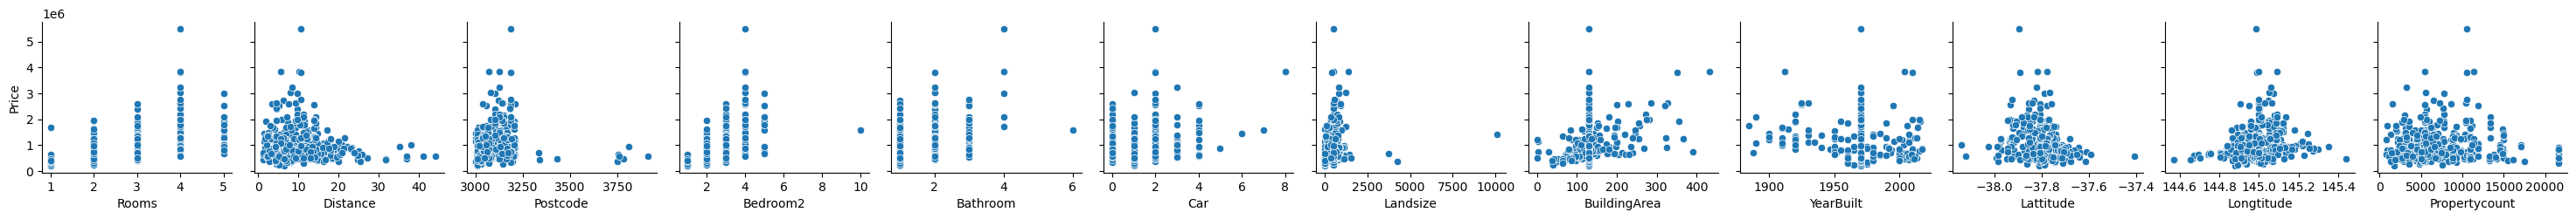

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# relationship with all variables
numeric_cols = Melbourne.select_dtypes(include=[np.number]).columns.tolist()
sns.pairplot(Melbourne, x_vars=[col for col in numeric_cols if col!='Price'], 
             y_vars='Price', kind='scatter')
plt.show()

Looking at above scatter plots, there seems to be overall positive relatioinship between number of rooms and price except that when room number reaches 5, the price dosen't go too high any more.The relationship between distance and price is not quite clear, but there seems that there is certain distance has higher price. The plot also shows that a certain postcodes tend to have higer prices, so this might impact price also. For Bedroom, bathroom, car, landsize, building area it seems the higher value could lead to higer prices but there are no really clear linear relationship. Most houses are relatively new and have higher price that old houses. Also it shows that certain lattitude and longititude tend to have higher price so this could be an important factor as well. The propertycount does not seem to have a major correlation with prices.

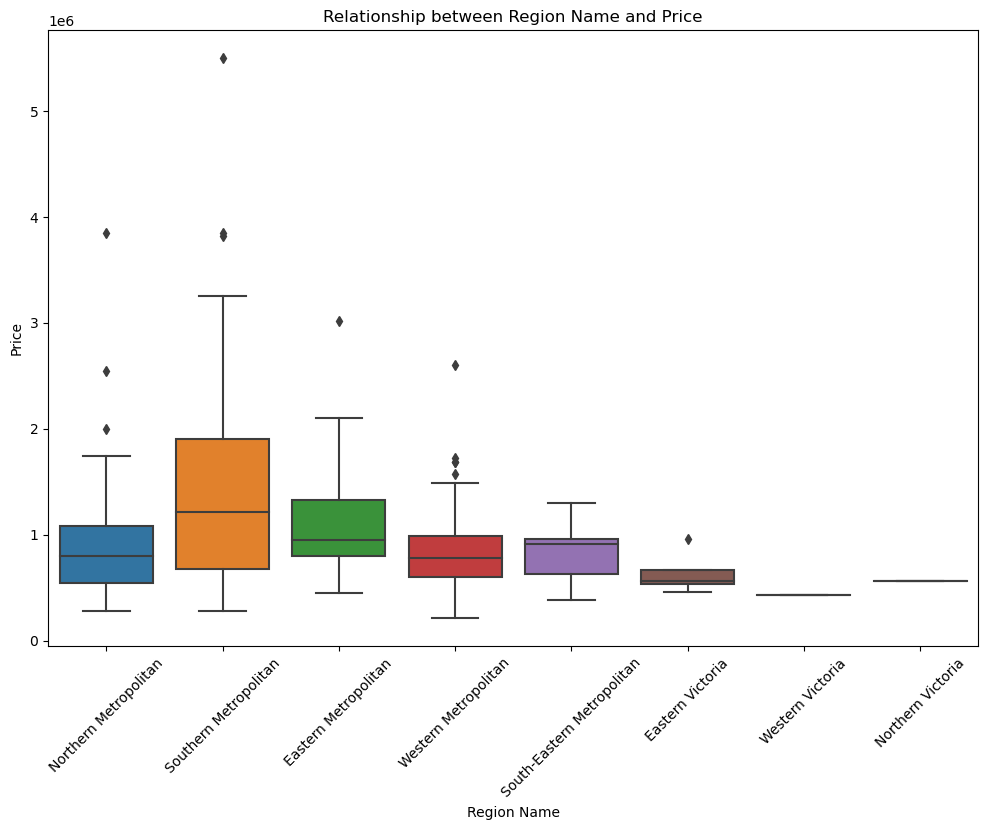

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# relationship between 'Regionname' and 'Price'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Regionname', y='Price', data=Melbourne)

plt.xticks(rotation=45) 
plt.title('Relationship between Region Name and Price')
plt.xlabel('Region Name')
plt.ylabel('Price')

plt.show()


Southern Metropolitan region seems to have a overall higher price of housing. 

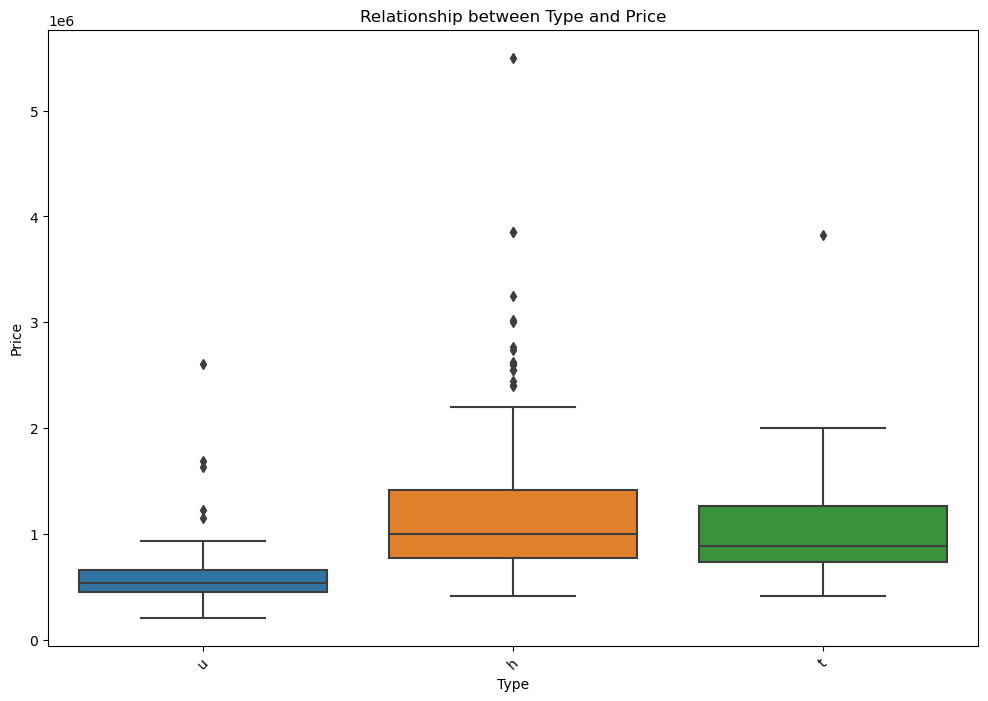

In [8]:
# relationship between 'Type' and 'Price'
plt.figure(figsize=(12, 8)) 
sns.boxplot(x='Type', y='Price', data=Melbourne)

plt.xticks(rotation=45)
plt.title('Relationship between Type and Price')
plt.xlabel('Type')
plt.ylabel('Price')

plt.show()

As for type of housing, it seems like house, cottage, villa, semi terrace have a overall higher price, followed by townhouse. 

In [9]:
import plotly.express as px
# group by region, calculate the mean of 'Price', 'Distance', 'Landsize', and 'Propertycount'
Melbourne1= Melbourne.groupby('Regionname').agg({
    'Price': 'mean',
    'Distance': 'mean',
    'Landsize': 'mean',
    'Propertycount': 'mean'
}).reset_index()


# top 7 RegionName with the highest average price
top_regionname = Melbourne1.nlargest(7, 'Price')

# scatter plot
fig = px.scatter(top_regionname, 
                 x='Propertycount', 
                 y='Price', 
                 size='Landsize', 
                 color='Regionname', 
                 hover_name='Regionname', 
                 hover_data=['Propertycount'],
                 title='Region Name by Average Price')
fig.show()

From this plot, it does seem Southern Metropolitan with around 7100-7200 property have relatively higer average price. The landsize doesn't seem like it suggests a correlation with the prices. 

In [10]:
import pandas as pd
import plotly.express as px

Melbourne2 = Melbourne
# Convert the 'Date' column to datetime
Melbourne2['Date'] = pd.to_datetime(Melbourne['Date'], errors='coerce')

# Group by 'Date' and calculate the mean of 'Price'
Melbourne2 = Melbourne2.groupby('Date')['Price'].mean().reset_index()

# Create the time series plot
fig = px.line(Melbourne2, x='Date', y='Price', title='Time Series of Average Price')

# Show the plot
fig.show()

C:\Users\szhou\AppData\Local\Temp\ipykernel_2060\1919373753.py:6: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\szhou\AppData\Local\Temp\ipykernel_2060\1919373753.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



There are some clear peaks at some regular intervals which could suggest that there is some seasonality in the dataset. For example, the prices peaked at mid-2017 and then dropped sharply. 

C:\Users\szhou\AppData\Local\Temp\ipykernel_2060\409321447.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751





 mu = 1037079.67 and sigma = 633703.28



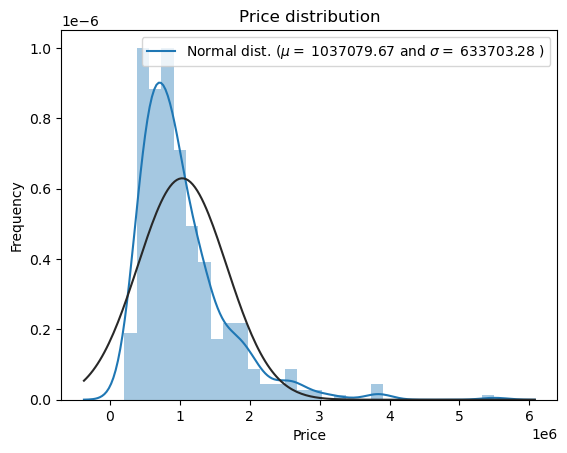

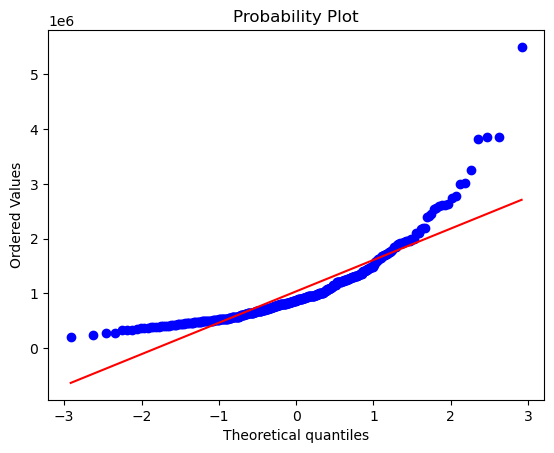

In [11]:
from scipy.stats import norm, skew
from scipy import stats
sns.distplot(Melbourne['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Melbourne['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

# QQ-plot
fig = plt.figure()
res = stats.probplot(Melbourne['Price'], plot=plt)
plt.show()

The distribution of "price" is not normal, its skewed to the right, which means there are a few housing have much higer prices. 

# 2. Linear Regression Model Development
- Develop a Linear regression model to predict price of house in Melbourne.

- Preprocess the data as necessary (handling missing values, encoding categorical variables, removing unnecessary columns etc.).

- Explain the steps you took in preparing the data and developing the model.

- You might need to encode the values for your prediction.

# Dealing with Date (add Month and Year and drop "Date")

As from above data exploring, the year of the "Date" are 2016, 2017, 2018, I think it makes more sense to convert "Date" to categorical data type as it can help in identifying and analyzing seasonal trends in the prices. Also some of the rows in "Date" even includes hours and minutes, which we don't really need. Grouping into years and months can simplify the data and easier to analyze the trends and seasonality. 

Below I will be extracting the year and the month of the "Date" and convert them to categorical. 

In [12]:
# Convert the 'Date' column to datetime
Melbourne['Date'] = pd.to_datetime(Melbourne['Date'], errors='coerce', dayfirst=True)

# Extract month and year as separate columns.
Melbourne['Month'] = Melbourne['Date'].dt.month
Melbourne['Year'] = Melbourne['Date'].dt.year

# Convert month and year to categorical data
Melbourne['Month'] = Melbourne['Month'].astype(str)
Melbourne['Year'] = Melbourne['Year'].astype(str)

# dropping Date
Melbourne.drop('Date', axis = 1, inplace = True)

C:\Users\szhou\AppData\Local\Temp\ipykernel_2060\4132861125.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\szhou\AppData\Local\Temp\ipykernel_2060\4132861125.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\szhou\AppData\Local\Temp\ipykernel_2060\4132861125.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [15]:
Melbourne

Suburb         Address  Rooms  Type      Price  Method  SellerG  \
0       154  7/67 Pender St      2     2   438000.0       3       41   
1        44      32 Rose St      2     0   901000.0       1       58   
2        18  2/25 Brooks St      3     2   800000.0       1       80   
3       152    2/35 John St      3     1  1155000.0       1       38   
4       139   1/35 Marne St      3     2  1630000.0       0       38   
..      ...             ...    ...   ...        ...     ...      ...   
493      63      8 Baird St      2     0   761000.0       1       65   
494     146  74 Hertford Rd      2     0   965000.0       1        3   
495     141   15 Phillip Av      3     0   721000.0       1       30   
496     107     150 Page St      3     0  1750000.0       4       29   
497      72   14 William St      3     0   501000.0       3       64   

     Distance  Postcode  Bedroom2  ...  Landsize  BuildingArea  YearBuilt  \
0         6.5      3071       2.0  ...       0.0          66.0     1970.0   
1         7.8      3058       2.0  ...     545.0         107.0     1940.0   
2        13.9      3165       3.0  ...     261.0         130.0     1970.0   
3        12.4      3107       3.0  ...     535.0         130.0     1970.0   
4         3.3      3141       3.0  ...       0.0         130.0     1970.0   
..        ...       ...       ...  ...       ...           ...        ...   
493      13.1      3060       2.0  ...     665.0          30.0     1970.0   
494      10.5      3020       2.0  ...     535.0         130.0     1970.0   
495      20.8      3171       3.0  ...     535.0         130.0     1970.0   
496       3.0      3206       3.0  ...     138.0         155.0     1885.0   
497      13.0      3046       3.0  ...     348.0         130.0     1970.0   

     CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  Month  \
0              6 -37.754100   145.00880           2           8870     10   
1              6 -37.744500   144.94710           2          11204      8   
2              8 -37.916300   145.07790           5          10969      7   
3             14 -37.805206   144.99751           0           5420      2   
4             17 -37.835900   144.98390           5          14887     11   
..           ...        ...         ...         ...            ...    ...   
493           11 -37.706730   144.97108           2           5070      8   
494            3 -37.782270   144.84038           6           3755     10   
495            9 -37.805206   144.99751           4           7412      8   
496           23 -37.849620   144.95856           5           2019      7   
497           22 -37.711900   144.91110           2           8870      7   

     Year  
0       0  
1       0  
2       0  
3       1  
4       0  
..    ...  
493     1  
494     1  
495     1  
496     1  
497     0  

[391 rows x 22 columns]

# Encode Categorical Variables

Below I will be using an easier way - labelEncoder to encode all categorial variables.

In [17]:
from sklearn.preprocessing import LabelEncoder
cols = ['Suburb', 'Type', 'Method', 'SellerG', 'Month', 'Year', 'CouncilArea', 'Regionname']
# apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(Melbourne[c].values)) 
    Melbourne[c] = lbl.transform(list(Melbourne[c].values))


C:\Users\szhou\AppData\Local\Temp\ipykernel_2060\3092280606.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\szhou\AppData\Local\Temp\ipykernel_2060\3092280606.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\szhou\AppData\Local\Temp\ipykernel_2060\3092280606.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

# Dropping Address

I am dropping the column of Address as I don't think it makes sense to include the address and make every single unique address as categorical variables. Also we have columns like suburb, lattitude, longtitude, distance, etc for geographic features already. 

In [18]:
Melbourne = Melbourne.drop(['Address'], axis=1) 

In [19]:
Melbourne

Suburb  Rooms  Type      Price  Method  SellerG  Distance  Postcode  \
0       154      2     2   438000.0       3       41       6.5      3071   
1        44      2     0   901000.0       1       58       7.8      3058   
2        18      3     2   800000.0       1       80      13.9      3165   
3       152      3     1  1155000.0       1       38      12.4      3107   
4       139      3     2  1630000.0       0       38       3.3      3141   
..      ...    ...   ...        ...     ...      ...       ...       ...   
493      63      2     0   761000.0       1       65      13.1      3060   
494     146      2     0   965000.0       1        3      10.5      3020   
495     141      3     0   721000.0       1       30      20.8      3171   
496     107      3     0  1750000.0       4       29       3.0      3206   
497      72      3     0   501000.0       3       64      13.0      3046   

     Bedroom2  Bathroom  ...  Landsize  BuildingArea  YearBuilt  CouncilArea  \
0         2.0       1.0  ...       0.0          66.0     1970.0            6   
1         2.0       1.0  ...     545.0         107.0     1940.0            6   
2         3.0       2.0  ...     261.0         130.0     1970.0            8   
3         3.0       1.0  ...     535.0         130.0     1970.0           14   
4         3.0       1.0  ...       0.0         130.0     1970.0           17   
..        ...       ...  ...       ...           ...        ...          ...   
493       2.0       1.0  ...     665.0          30.0     1970.0           11   
494       2.0       1.0  ...     535.0         130.0     1970.0            3   
495       3.0       1.0  ...     535.0         130.0     1970.0            9   
496       3.0       2.0  ...     138.0         155.0     1885.0           23   
497       3.0       1.0  ...     348.0         130.0     1970.0           22   

     Lattitude  Longtitude  Regionname  Propertycount  Month  Year  
0   -37.754100   145.00880           2           8870     10     0  
1   -37.744500   144.94710           2          11204      8     0  
2   -37.916300   145.07790           5          10969      7     0  
3   -37.805206   144.99751           0           5420      2     1  
4   -37.835900   144.98390           5          14887     11     0  
..         ...         ...         ...            ...    ...   ...  
493 -37.706730   144.97108           2           5070      8     1  
494 -37.782270   144.84038           6           3755     10     1  
495 -37.805206   144.99751           4           7412      8     1  
496 -37.849620   144.95856           5           2019      7     1  
497 -37.711900   144.91110           2           8870      7     0  

[391 rows x 21 columns]

# Build Linear regression model

In [20]:
import statsmodels.api as sm
X = Melbourne.drop(['Price'], axis=1) 
y = Melbourne['Price']
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     27.70
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           2.65e-61
Time:                        09:48:34   Log-Likelihood:                -5599.4
No. Observations:                 391   AIC:                         1.124e+04
Df Residuals:                     370   BIC:                         1.132e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.522e+08   4.09e+07     -3.719      0.000   -2.33e+08   -7.17e+07
Suburb         -330.3230    438.445     -0.753      0.452   -1192.480     531.834
Rooms          2.019e+05   4.17e+04      4.842      0.000     1.2e+05    2.84e+05
Type          -1.842e+05   3.35e+04     -5.494      0.000    -2.5e+05   -1.18e+05
Method        -1.246e+04   1.79e+04     -0.696      0.487   -4.77e+04    2.27e+04
SellerG         106.2389    873.792      0.122      0.903   -1611.983    1824.460
Distance      -5.096e+04   4256.085    -11.974      0.000   -5.93e+04   -4.26e+04
Postcode       1212.0098    248.238      4.882      0.000     723.876    1700.144
Bedroom2      -2.201e+04   4.48e+04     -0.492      0.623    -1.1e+05     6.6e+04
Bathroom       1.995e+05   4.28e+04      4.655      0.000    1.15e+05    2.84e+05
Car            1.677e+04   2.22e+04      0.755      0.451   -2.69e+04    6.04e+04
Landsize         46.0800     35.599      1.294      0.196     -23.923     116.083
BuildingArea   1664.7639    498.469      3.340      0.001     684.576    2644.952
YearBuilt     -3576.0462    999.206     -3.579      0.000   -5540.881   -1611.212
CouncilArea   -1.059e+04   2498.638     -4.238      0.000   -1.55e+04   -5674.789
Lattitude     -1.374e+06   3.34e+05     -4.111      0.000   -2.03e+06   -7.17e+05
Longtitude     7.183e+05   3.09e+05      2.325      0.021    1.11e+05    1.33e+06
Regionname     2.107e+04   1.36e+04      1.548      0.122   -5696.786    4.78e+04
Propertycount     1.6067      5.052      0.318      0.751      -8.327      11.540
Month         -2259.7162   6200.912     -0.364      0.716   -1.45e+04    9933.733
Year           3.858e+04   2.42e+04      1.595      0.112   -8980.904    8.61e+04
==============================================================================
Omnibus:                      230.231   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2779.954
Skew:                           2.258   Prob(JB):                         0.00
Kurtosis:                      15.258   Cond. No.                     1.78e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R^2 is 0.600 which means that 60% of the variation in "price" can be explained by the linear regression model. And the adjusted R^2 is 0.578 which is a more accurate measure. There should be still room for improvement for the model. 

The condition number is 1.78e+07 which is quite large, this indicates that there is potential multicollinearity issues, and some features are correlated with each other. 

# 3. Model Evaluation
- Evaluate your linear regression model using appropriate metrics.

- Split the dataset into training and testing sets to perform this evaluation.

- Interpret these metrics to assess the performance of your model. Is it good? Why?

In [21]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = Melbourne.drop(['Price'], axis=1) 
y = Melbourne['Price']
X = sm.add_constant(X)

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
model = sm.OLS(y_train, X_train).fit()
# print(model.summary())

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics on test data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = len(X_test)  
p = X_test.shape[1] - 1  
adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)

print(f'linear testing MSE: {mse}')
print(f'linear testing RMSE: {rmse}')
print(f'linear testing R-squared: {r2}')
print(f'linear testing Adjusted R-squared: {adjusted_r2}')


linear testing MSE: 381849588553.81445
linear testing RMSE: 617939.7936318832
linear testing R-squared: 0.4764315962352902
linear testing Adjusted R-squared: 0.29589076735090747


The MSE and RMSE are both quite high, this could be due to overfitting, multicollinearity. 

The R^2 value is around 0.476, which means less than half of the variation in price is predicted by the features in the model. The adjusted R^2 of 0.296 is quite lower than the R^2, which could indicate that some of the varaibles in the model may not show much power to the model. The substantial difference between R^2 and adjusted R^2 could be due to overfitting of the model, and there are variables that are not necessary in the model. 

In general, my conclusion is this model is not performing really well. It is capturing some of the variations in the data, but not enough to make accurate predictions. 

# 4. Regularization
- Is there a need for Lasso regularization? Explain. (Compare test and training results)

- Set up a Lasso regression model with specified parameters and fit it to the training data.

- Perform Lasso regression on both training and test data

- Analyze and explain how the results change from previous answer.

In [22]:
# model on training data
model = sm.OLS(y_train, X_train).fit()
# print(model.summary())

# performance metrics on train dataset
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
n = len(y_train)
p = X_train.shape[1] - 1
adjusted_r2_train = 1 - (1-r2_train) * (n-1) / (n-p-1)

print(f'linear Training MSE: {mse_train}')
print(f'linear Training RMSE: {rmse_train}')
print(f'linear Training R-squared: {r2_train}')
print(f'linear Training Adjusted R-squared: {adjusted_r2_train}')


linear Training MSE: 112870492044.17017
linear Training RMSE: 335962.03958806145
linear Training R-squared: 0.639683295701251
linear Training Adjusted R-squared: 0.6149192610415433


As shown above, the MSE and RMSE for test data is a lot higehr than that for training data. This indicates that the model has much higher error on predicting new data. Also the difference of R^2 between training data and testing data (0.64 vs 0.47) also indicates that the model does not predict well on the new data. For the training data, the adjusted R^2 is much closer to its R^2, which suggests that there is a better balance of number of features and model fit on the training data, but the testing data is not.

Based on above, the model's performance on test data is a lot worse than that on the training data. there is indication of overfitting. Using Lasso regularization could help improve it as it could penalize the less important features. 

# Lasso Regression model

In [23]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = Melbourne.drop(['Price'], axis=1) 
y = Melbourne['Price']

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# use LassoCV model to find the best alpha
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# use the best alpha to fit a Lasso model
lasso = Lasso(alpha=lasso_cv.alpha_, random_state=42)
lasso.fit(X_train_scaled, y_train)

# predictions
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

# evaluation metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
n_train = X_train_scaled.shape[0]
p = X_train_scaled.shape[1]
adjusted_r2_train = 1 - (1-r2_train) * (n_train-1) / (n_train-p-1)

# evaluation metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
n_test = X_test_scaled.shape[0]
adjusted_r2_test = 1 - (1-r2_test) * (n_test-1) / (n_test-p-1)

# Print results
print(f'Lasso Training MSE: {mse_train}')
print(f'Lasso Training RMSE: {rmse_train}')
print(f'Lasso Training R-squared: {r2_train}')
print(f'Lasso Training Adjusted R-squared: {adjusted_r2_train}')
print(f'Lasso Test MSE: {mse_test}')
print(f'Lasso Test RMSE: {rmse_test}')
print(f'Lasso Test R-squared: {r2_test}')
print(f'Lasso Test Adjusted R-squared: {adjusted_r2_test}')


Lasso Training MSE: 115435907921.23874
Lasso Training RMSE: 339758.6024241899
Lasso Training R-squared: 0.6314937133113798
Lasso Training Adjusted R-squared: 0.6061668207554609
Lasso Test MSE: 394883210233.44116
Lasso Test RMSE: 628397.3346804084
Lasso Test R-squared: 0.45856070491412915
Lasso Test Adjusted R-squared: 0.2718574997121048


Based on the comparison betwee testing data and training data on both linear and lasso regression, it doesn't seem like lasso is performing better, which is not usually the case. This could be that the lasso model has a too high alpha which pushes the model to underfitting. Below by performing out of sample performace, I will further investigate that. 

# 5. Out-of-sample performance 
- Ignore all previously trained models.

- Split the data into a new training and test 80-20.

- Newly train (fit) the linear regression model on the training data.

- Newly train (fit) the lasso regression model on the training data.

- Estimate AIC, AICc, BIC, as well as 5-fold CV for both models using only the training data.

- Estimate the models true OOS performance by computing their deviance on the test data.

- Compare all (deviance) values.  Which IC is most similar to the models’ true OOS performance?  How does 5-fold CV compare?  Explain.

# Train the models, calculate AIC, AICC, BIC, 5-fold CV

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

X = Melbourne.drop(['Price'], axis=1)
y = Melbourne['Price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=500)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Lasso model with cross-validated alpha
lasso_model = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5)
lasso_model.fit(X_train_scaled, y_train)

# Predictions on both training data
y_pred_linear = linear_model.predict(X_val_scaled)
y_pred_lasso = lasso_model.predict(X_val_scaled)

# Evaluation metrics for Linear Regression model
mse_linear = mean_squared_error(y_val, y_pred_linear)
r2_linear = r2_score(y_val, y_pred_linear)

# Evaluation metrics for Lasso model
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)

print("Linear Regression - MSE:", mse_linear, "R²:", r2_linear)
print("Lasso Regression - MSE:", mse_lasso, "R²:", r2_lasso)
print("Optimal alpha for Lasso:", lasso_model.alpha_)

# Method to calculate AIC, AICC, BIC
def calculate_criteria(model, X, y):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    n = len(y)
    k = X.shape[1] + 1  # Include intercept
    aic = n * np.log(mse) + 2 * k
    aicc = aic + (2 * k * (k + 1)) / (n - k - 1)
    bic = n * np.log(mse) + k * np.log(n)
    return aic, aicc, bic

# Calculate AIC, AICc, BIC for models on train dataset
linear_criteria = calculate_criteria(linear_model, X_train_scaled, y_train)
lasso_criteria = calculate_criteria(lasso_model, X_train_scaled, y_train)

print("Linear Regression - AIC, AICc, BIC:", linear_criteria)
print("Lasso Regression - AIC, AICc, BIC:", lasso_criteria)


Linear Regression - MSE: 114807399708.48744 R²: 0.6299113636907274
Lasso Regression - MSE: 107444639029.11385 R²: 0.6536456705927194
Optimal alpha for Lasso: 10000.0
Linear Regression - AIC, AICc, BIC: (8122.382832800527, 8125.569039697079, 8200.985899744526)
Lasso Regression - AIC, AICc, BIC: (8126.205417562701, 8129.391624459253, 8204.8084845067)


In [25]:
from sklearn.model_selection import cross_val_score

# 5-fold Cross-Validation for Linear Regression
linear_cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# 5-fold Cross-Validation for Lasso Regression
lasso_cv_scores = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# take the negative and then calculate the mean to get MSE
mean_linear_cv_mse = -linear_cv_scores.mean()
mean_lasso_cv_mse = -lasso_cv_scores.mean()

print("Linear Regression - 5-fold CV Mean MSE:", mean_linear_cv_mse)
print("Lasso Regression - 5-fold CV Mean MSE:", mean_lasso_cv_mse)

Linear Regression - 5-fold CV Mean MSE: 228766992868.92105
Lasso Regression - 5-fold CV Mean MSE: 220864463290.40967


The Lasso Regression shows a slightly better R^2 and lower MSE, suggesting it is more accurate and explains more variation than that on linear regression model. 

The slightly worse AIC, BIC values for lasso, but lower 5-fold CV mean MSE than that of linear regression (228B vs 220B) could suggests that the lasso model maybe more robust to overfitting compared to linear regression. The comparison of ICs and cross-validation suggests that while linear model may fit training data slightly better, the lasso model may ofer better out-of-sample performace. Below will present true OOS performace on the test data. 

# Out Of Sample Performace

In [26]:
def deviance(y, pred, family="gaussian"):
    if family == "gaussian":
        return np.sum((y - pred) ** 2)
    elif family == "binomial":
        y = np.array(y)
        pred = np.array(pred)
        return -2 * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))
def R2(y, pred, family="gaussian"):
    dev_val = deviance(y, pred, family=family)
    dev0 = deviance(y, [np.mean(y)] * len(y), family=family)
    return 1 - dev_val / dev0

In [27]:
from sklearn.model_selection import KFold
# Setup the experiment
n = len(Melbourne)
K = 5
foldid = np.tile(np.arange(1, K+1), int(np.ceil(n/K)))[:n]
np.random.shuffle(foldid)

# Initialize KFold
X = Melbourne.drop(['Price'], axis=1)
y = Melbourne['Price']

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

kf = KFold(n_splits=5, shuffle=True, random_state=500)

# Initialize lists to store results
deviances_LR = []
deviances_Lasso = []
r2_scores_LR = []
r2_scores_Lasso = []

# Start the KFold cross-validation loop
for train_index, test_index in kf.split(X):
    # Split data
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y[train_index], y[test_index]

    # Scale the features 
    scaler = StandardScaler()
    X_train_scaled_kf = scaler.fit_transform(X_train_kf)
    X_test_scaled_kf = scaler.transform(X_test_kf)

    # Linear Regression model
    LR_model = LinearRegression()
    LR_model.fit(X_train_scaled_kf, y_train_kf)
    pred_LR = LR_model.predict(X_test_scaled_kf)
    deviances_LR.append(deviance(y_test_kf, pred_LR))
    r2_scores_LR.append(r2_score(y_test_kf, pred_LR))

    # Lasso model with the alpha from LassoCV
    Lasso_model = Lasso(alpha=lasso_model.alpha_)
    Lasso_model.fit(X_train_scaled_kf, y_train_kf)
    pred_Lasso = Lasso_model.predict(X_test_scaled_kf)
    deviances_Lasso.append(deviance(y_test_kf, pred_Lasso))
    r2_scores_Lasso.append(r2_score(y_test_kf, pred_Lasso))

In [28]:
r2_scores_LR

[0.629911363690727,
 0.5832168298176847,
 0.38167893037395506,
 0.36597329501551035,
 0.44665512671523255]

In [29]:
r2_scores_Lasso

[0.6536456705927195,
 0.5823360568376988,
 0.4574302615963932,
 0.3815988022398663,
 0.4401636739171879]

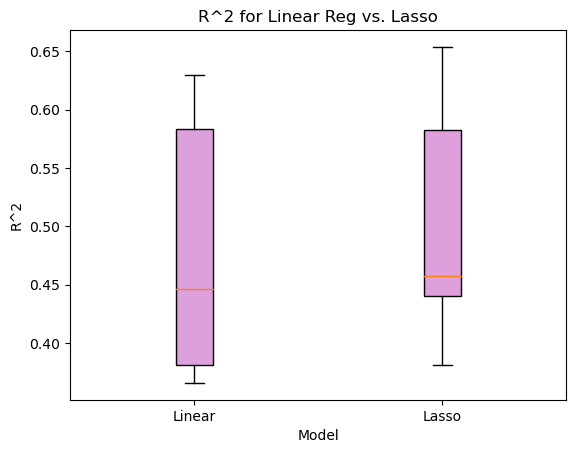

In [30]:
plt.boxplot([r2_scores_LR, r2_scores_Lasso], labels=['Linear', 'Lasso'], patch_artist=True, boxprops=dict(facecolor="plum"))
plt.ylabel('R^2')
plt.xlabel('Model')
plt.title('R^2 for Linear Reg vs. Lasso')
plt.show()

In [31]:
# Print average R^2 and deviance for each model
avg_r2_LR = np.mean(r2_scores_LR)
avg_r2_Lasso = np.mean(r2_scores_Lasso)
avg_deviance_LR = np.mean(deviances_LR)
avg_deviance_Lasso = np.mean(deviances_Lasso)

print("Average R^2 for Linear Regression Model:", avg_r2_LR)
print("Average R^2 for Lasso Regression Model:", avg_r2_Lasso)
print("Average deviance for Linear Regression Model:", avg_deviance_LR)
print("Average deviance for Lasso Regression Model:", avg_deviance_Lasso)

Average R^2 for Linear Regression Model: 0.48148710912262194
Average R^2 for Lasso Regression Model: 0.5030348930367732
Average deviance for Linear Regression Model: 15366313558843.166
Average deviance for Lasso Regression Model: 14999618740496.355


The Lasso Regression has a slightly higher average R^2 and lower average deviance compared to linear regression, which suggests that lasso may perform better for explaining the variations and also minimizing prediction errors. The lower range of R^2 aross different folds also suggests that lasso is more stable on predicting. 

Based on the ICs and 5-fold CV mse calculations earlier, the 5-fold CV mse for lasso is slightly lower than for linear regression, which is a better OOS performace for lasso based on my discussion above that lasso model generalize better to predict data compared to linear regression model. 